In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/ludovicaverde/tyres-train/tyres_train.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# UPLOAD DATASET

In [ ]:
# RUN FEDE
data = pd.read_csv("/kaggle/input/d/federico25/tyres-train/tyres_train.csv", sep = ",")

data.head(30)

In [2]:
# RUN ELE
data = pd.read_csv("tyres_train.csv", sep = ",")

data.head(30)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


In [6]:
# RUN LUDO
data = pd.read_csv("/kaggle/input/d/ludovicaverde/tyres-train/tyres_train.csv", sep = ",")

data.head(30)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


# DATA OBSERVATION E PREPARATION

In [3]:
data.dtypes
# no need to create dummies because categorical variables are already numeric

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object

In [4]:
data.isnull().sum()
# the variable "diameter" is almost void --> impossible to proceed with substitution

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

In [5]:
#dropping all column "diameter"
d="diameter"
data_dropped = data.drop(columns=d)

data_dropped.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0


In [10]:
selection_categorical=['tread_type', 'tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical=data_dropped[selection_categorical]
data_categorical.head()

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers
0,0,1,8,0,1,1,1
1,2,0,11,1,1,0,1
2,0,0,0,1,1,0,1
3,1,0,7,3,1,1,1
4,0,1,2,2,2,0,1


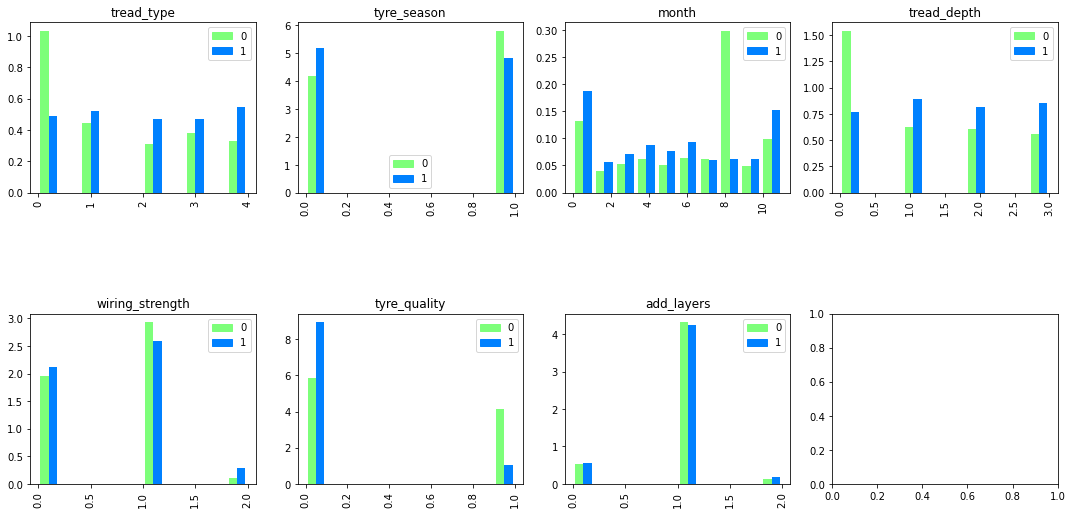

In [11]:
from matplotlib.patches import Rectangle
import numpy as np

data_0=data_categorical[data_dropped['failure']==0] # records wih target==0
data_1=data_categorical[data_dropped['failure']==1] # records wih target==1

cmap = plt.get_cmap('jet')
col=[cmap(0.5),cmap(0.25)]
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([data_0[x],data_1[x]],density=True,color=col)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    handles = [Rectangle((0,0),1,1,color=c)for c in col]
    labels= ["0","1"]
    plt.legend(handles, labels)
    i+=1
plt.show()

In [12]:
dummies = pd.get_dummies(data_dropped[selection_categorical].astype(str)) 
dummies.tail()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,add_layers_0,add_layers_1,add_layers_2
2995,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2996,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2997,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2998,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2999,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [14]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]
data_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0


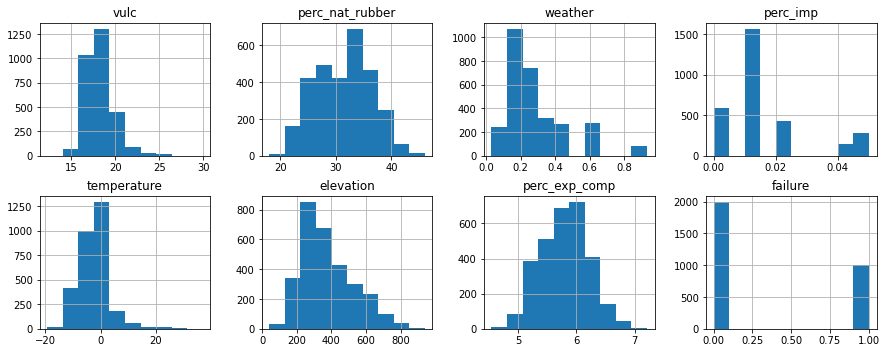

In [16]:
data_hist=data_numerical.hist(layout=(4,4), figsize=(15,12))
# we can try to normalize vulc, temperature and elevation

In [15]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

data_numerical['logvulc']=data_numerical['vulc'].apply(lambda x: math.log(x+1))
data_numerical['logtemp']=data_numerical['temperature'].apply(lambda x: math.log(x+20)) #translate negative values
data_numerical['logelev']=data_numerical['elevation'].apply(lambda x: math.log(x+1))

selection_numerical_log=['logvulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'logtemp', 'logelev',
       'perc_exp_comp','failure']
data_numerical_log=data_numerical[selection_numerical_log]
data_numerical=data_numerical[selection_numerical]


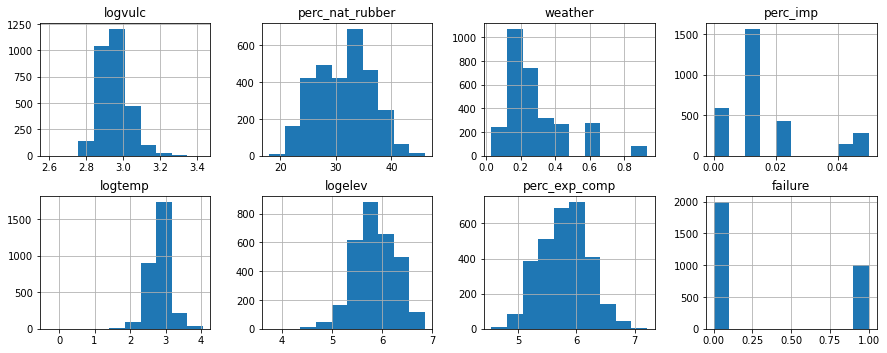

In [18]:
data_hist=data_numerical_log.hist(layout=(4,4), figsize=(15,12))

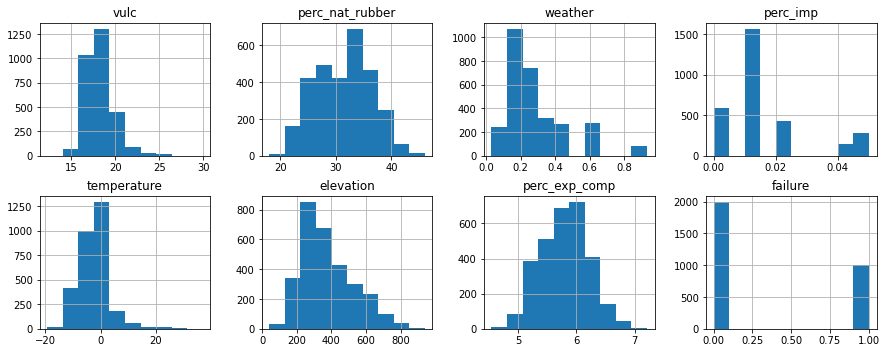

In [19]:
data_hist=data_numerical.hist(layout=(4,4), figsize=(15,12))

we can chose what kind of data we prefer to use --> better log version beacuse in more symmetric (vulc doesn't change a lot)

<AxesSubplot:>

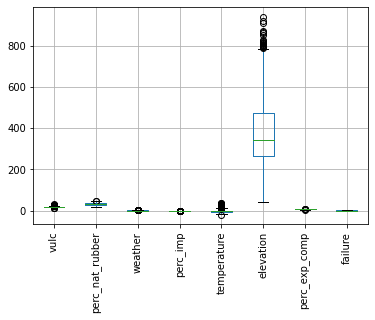

In [20]:
data_numerical.boxplot(rot=90)
# the scale of numerical variables is too different

<AxesSubplot:>

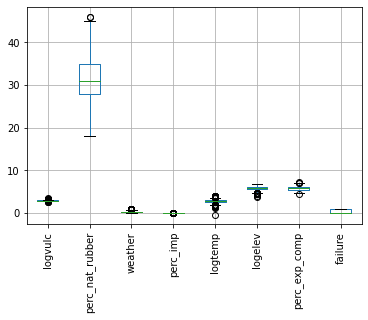

In [21]:
data_numerical_log.boxplot(rot=90)
# the scale of numerical variables is too different

In [16]:
from sklearn.preprocessing import StandardScaler

independent_variables=data_numerical.iloc[:,:-1] #no target
independent_variables_log=data_numerical_log.iloc[:,:-1] #no target

scaler = StandardScaler().fit(independent_variables) # No target
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns

scaler_log = StandardScaler().fit(independent_variables_log)
scaled_data_log = pd.DataFrame(scaler_log.transform(independent_variables_log))
scaled_data_log.columns = independent_variables_log.columns


<AxesSubplot:>

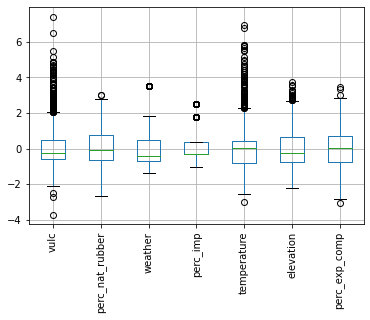

In [23]:
scaled_data.boxplot(rot=90)

<AxesSubplot:>

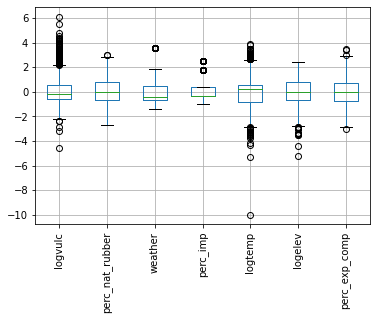

In [24]:
scaled_data_log.boxplot(rot=90)

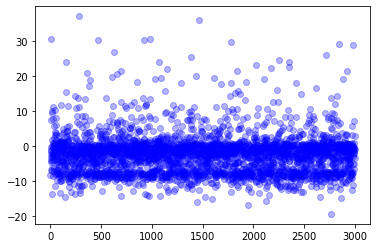

In [25]:
plt.scatter(range(3000),data_dropped["temperature"],alpha=.3,c='blue')

In [17]:
# Create final dataset with all modifications and target variable included
df=pd.concat([dummies,scaled_data_log],axis =1)
df['failure']=data_dropped['failure']

df.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,add_layers_1,add_layers_2,logvulc,perc_nat_rubber,weather,perc_imp,logtemp,logelev,perc_exp_comp,failure
0,1,0,0,0,0,0,1,0,0,0,...,1,0,-0.088369,-1.064306,-0.671245,-0.319087,-1.095191,-0.105885,-1.612448,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,1.601196,0.963073,0.092857,-0.319087,-0.257099,-0.139339,0.873829,0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,0.665316,0.557597,0.092857,-0.319087,0.378281,-0.835316,1.385710,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,-0.905448,0.760335,-0.507509,0.382204,1.555449,0.396645,2.019467,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,-0.667557,-1.672520,0.584065,-0.319087,3.488045,-0.293779,0.873829,0


# MODELS

## Separate train/test set

In [38]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [39]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=None, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2100, 14) (900, 14)


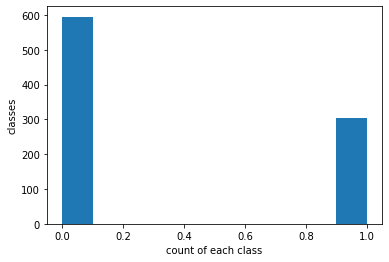

In [29]:
#Visualize Class Counts
plt.hist(y_test)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## Funzione per iperparametri


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [42]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[CV 3/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 1/32] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5;, score=0.515 total time=   0.0s
[CV 1/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 1/3; 3/32] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5;, score=0.474 total time=   0.0s
[CV 3/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 3/3; 3/32] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5;, score=0.515 total time=   0.0s
[CV 3/3; 4/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=10
[CV 3/3; 4/32] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=10;, score=0.515 total time=   0.0s
[CV 3/3; 5/32] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 5/32] END criterion=entropy,

## Curva ROC

In [50]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)


parameters = {'criterion': ['gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node.

hyperp_search(model,parameters)

f1_train: 0.545235 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 5}
f1         train 0.652   test 0.560
precision  train 0.714   test 0.610

[[494 101]
 [147 158]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       595
           1       0.61      0.52      0.56       305

    accuracy                           0.72       900
   macro avg       0.69      0.67      0.68       900
weighted avg       0.72      0.72      0.72       900



In [31]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

[[484 111]
 [148 157]]


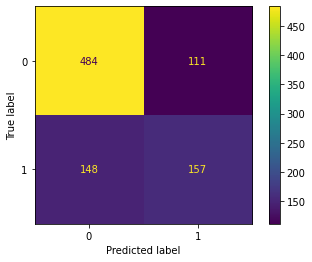

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

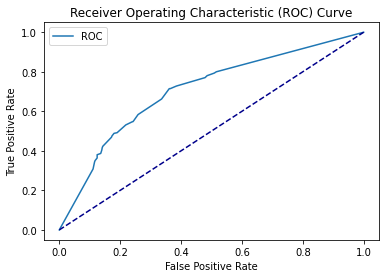

AUC: 0.71


In [51]:
#curva ROC
fpr1,tpr1=roc(model,X_train,y_train,X_test,y_test)

In [52]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10, 50],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [53]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [54]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [55]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.517856 using {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.444456 (0.072893) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.444456 (0.072893) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.444456 (0.072893) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.444456 (0.072893) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.487856 (0.053358) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.485592 (0.053882) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.488130 (0.053215) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.488130 (0.053215) with: {'criterion': 'entropy', 'max_dept

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 3/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 1/32] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5;, score=0.515 total time=   0.0s
[CV 1/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 1/3; 3/32] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5;, score=0.474 total time=   0.0s
[CV 1/3; 5/32] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5
[CV 1/3; 5/32] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5;, score=0.558 total time=   0.0s
[CV 2/3; 5/32] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5
[CV 2/3; 5/32] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5;, score=0.428 total time=   0.0s
[CV 2/3; 8/32] START criterion=entropy, max_depth=5, min_samples_leaf=4

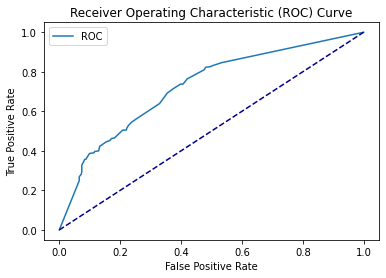

AUC: 0.72


(array([0.        , 0.06554622, 0.06554622, 0.07226891, 0.07394958,
        0.07394958, 0.08403361, 0.08739496, 0.09915966, 0.11428571,
        0.11596639, 0.12941176, 0.13277311, 0.15462185, 0.16638655,
        0.17142857, 0.18151261, 0.20840336, 0.22016807, 0.22184874,
        0.22689076, 0.23697479, 0.25210084, 0.32941176, 0.35462185,
        0.37478992, 0.39831933, 0.40672269, 0.42016807, 0.47563025,
        0.47731092, 0.48067227, 0.49747899, 0.50084034, 0.53277311,
        1.        ]),
 array([0.        , 0.24918033, 0.26885246, 0.28196721, 0.29508197,
        0.32786885, 0.35737705, 0.35737705, 0.38688525, 0.39016393,
        0.39672131, 0.4       , 0.42295082, 0.44590164, 0.45245902,
        0.46229508, 0.46557377, 0.50491803, 0.50491803, 0.5147541 ,
        0.52786885, 0.5442623 , 0.56065574, 0.63934426, 0.69180328,
        0.7147541 , 0.73770492, 0.73770492, 0.76393443, 0.80983607,
        0.81311475, 0.82295082, 0.82622951, 0.8295082 , 0.84590164,
        1.        ]))

In [56]:
#curva ROC
roc(gs,X_train,y_train,X_test,y_test)

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

In [58]:
hyperp_search(classifier,parameters)

f1_train: 0.488112 using {'n_neighbors': 30}
f1         train 0.508   test 0.525
precision  train 0.716   test 0.694

[[538  57]
 [176 129]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       595
           1       0.69      0.42      0.53       305

    accuracy                           0.74       900
   macro avg       0.72      0.66      0.67       900
weighted avg       0.73      0.74      0.72       900



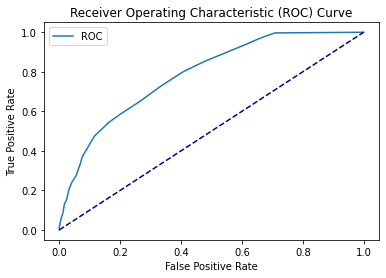

AUC: 0.78


(array([0.        , 0.        , 0.00168067, 0.00336134, 0.00672269,
        0.01176471, 0.01680672, 0.02352941, 0.03193277, 0.04201681,
        0.05546218, 0.06890756, 0.07563025, 0.11596639, 0.16302521,
        0.20168067, 0.26386555, 0.33109244, 0.40672269, 0.47731092,
        0.55462185, 0.61176471, 0.65546218, 0.68403361, 0.7092437 ,
        0.71764706, 0.72436975, 0.72773109, 1.        ]),
 array([0.        , 0.01639344, 0.02295082, 0.03934426, 0.06229508,
        0.0852459 , 0.13114754, 0.15081967, 0.20655738, 0.24262295,
        0.27540984, 0.33442623, 0.3704918 , 0.47540984, 0.5442623 ,
        0.58688525, 0.64918033, 0.72459016, 0.8       , 0.85245902,
        0.90163934, 0.93770492, 0.96721311, 0.98360656, 0.99672131,
        0.99672131, 0.99672131, 0.99672131, 1.        ]))


[CV 3/3; 22/32] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10
[CV 3/3; 22/32] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10;, score=0.493 total time=   0.0s
[CV 1/3; 23/32] START criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5
[CV 1/3; 23/32] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.633 total time=   0.0s
[CV 2/3; 23/32] START criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5
[CV 2/3; 23/32] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.422 total time=   0.0s
[CV 3/3; 23/32] START criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5
[CV 3/3; 23/32] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.491 total time=   0.0s
[CV 1/3; 24/32] START criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10
[CV 1/3; 24/32] END criterion=gini, max_depth=5, min_

In [60]:
model_knn = KNeighborsClassifier(n_neighbors=30)

#curva ROC
roc(model_knn,X_train,y_train,X_test,y_test)

## NAYVE BAYES

## LOGISTIC REGRESSION

## SVM
--> pay attention: it takes a long time to run

# CHOICE OF THE MODEL

# PREDICTIONS